## Câu 1
### Bài toán phân loại và hồi quy sử dụng các phương pháp học máy

### Mục tiêu
Sử dụng các phương pháp học máy đã học (và có thể mở rộng thêm các phương pháp khác) để giải bài toán theo cả hai hướng: phân loại (classification) và hồi quy (regression). Thực hiện quy trình gồm các bước dưới đây để xử lý và đánh giá bài toán.

---

### Các bước thực hiện

#### 1. Thống kê đặc điểm của dữ liệu bằng Data Visualization
   - Khám phá đặc điểm tổng quát của dữ liệu, bao gồm phân phối của các biến, sự tương quan giữa các đặc trưng, và xác định các mẫu dữ liệu bất thường (outliers).
   - Sử dụng các biểu đồ như histogram, boxplot, scatter plot, heatmap,... để thể hiện trực quan các đặc điểm này.

#### 2. Tiền xử lý dữ liệu
   - **Type Conversion**: Chuyển đổi kiểu dữ liệu nếu cần thiết (ví dụ: từ dạng chuỗi sang số hoặc nhãn phân loại).
   - **Data Normalization**: Chuẩn hóa dữ liệu để đưa các giá trị về cùng thang đo, tăng hiệu quả của các thuật toán học máy.

#### 3. Phân chia dữ liệu thành tập train và tập evaluation
   - Chia dữ liệu thành hai tập: **Train** và **Evaluation** theo tỷ lệ phù hợp (ví dụ 80/20 hoặc 70/30).
   - Đảm bảo rằng cả hai tập này đều có phân phối dữ liệu phù hợp để đảm bảo tính đại diện.

#### 4. Thực hiện phân loại và hồi quy
   - **Phân loại (Classification)**: Áp dụng các phương pháp phân loại khác nhau như SVM, KNN, Random Forest, hoặc các thuật toán khác.
   - **Hồi quy (Regression)**: Thử nghiệm các phương pháp hồi quy như Linear Regression, Decision Tree Regressor, SVR,...

#### 5. Đánh giá kết quả và so sánh các phương pháp
   - Đánh giá hiệu quả của các phương pháp bằng các chỉ số như độ chính xác, F1-score cho phân loại, hoặc MAE, RMSE cho hồi quy.
   - **So sánh các phương pháp**: Sử dụng biểu đồ để hiển thị kết quả của các phương pháp phân loại và hồi quy, cho phép quan sát sự khác biệt giữa các phương pháp một cách trực quan.
   - **Biểu đồ trực quan**: Ví dụ sử dụng bar chart hoặc line chart để thể hiện độ chính xác, lỗi trung bình của các phương pháp.

---

### Kết luận
Tóm tắt các kết quả đạt được từ các phương pháp phân loại và hồi quy, nêu bật phương pháp hiệu quả nhất trong việc giải quyết bài toán.


## Thêm các thư viện

In [1033]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import probplot, boxcox
import pylab
from jcopml.plot import plot_residual, plot_actual_vs_prediction, plot_roc_curve


In [1084]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression, LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR

In [1035]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.metrics import accuracy_score

## Thống kê dữ liệu

### Tổng quan dữ liệu

In [1036]:
pd.options.display.max_columns = None

In [1037]:
rental = pd.read_csv('apartments_for_rent_classified_10K.csv', sep=';', encoding='latin1')

rental.head()


,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,NaN,0.0,USD,No,Thumbnail,None,790,$790,Monthly,101,NaN,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,NaN,1.0,USD,No,Thumbnail,None,425,$425,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1.0,0.0,USD,No,Thumbnail,None,1390,"$1,390",Monthly,107,NaN,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",NaN,1.0,0.0,USD,No,Thumbnail,None,925,$925,Monthly,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,NaN,0.0,USD,No,Thumbnail,None,880,$880,Monthly,125,NaN,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401


In [1038]:
rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10000 non-null  int64  
 1   category       10000 non-null  object 
 2   title          10000 non-null  object 
 3   body           10000 non-null  object 
 4   amenities      6451 non-null   object 
 5   bathrooms      9966 non-null   float64
 6   bedrooms       9993 non-null   float64
 7   currency       10000 non-null  object 
 8   fee            10000 non-null  object 
 9   has_photo      10000 non-null  object 
 10  pets_allowed   8252 non-null   object 
 11  price          10000 non-null  int64  
 12  price_display  10000 non-null  object 
 13  price_type     10000 non-null  object 
 14  square_feet    10000 non-null  int64  
 15  address        6673 non-null   object 
 16  cityname       9923 non-null   object 
 17  state          9923 non-null   object 
 18  latitud

In [1039]:
rental.describe()

,id,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
count,1.000000e+04,9966.000000,9993.000000,10000.000000,10000.000000,9990.000000,9990.000000,1.000000e+04
mean,5.623396e+09,1.380544,1.744021,1486.277500,945.810500,37.695162,-94.652247,1.574891e+09
std,7.021025e+07,0.615410,0.942354,1076.507968,655.755736,5.495851,15.759805,3.762395e+06
min,5.508654e+09,1.000000,0.000000,200.000000,101.000000,21.315500,-158.022100,1.568744e+09
25%,5.509248e+09,1.000000,1.000000,949.000000,649.000000,33.679850,-101.301700,1.568781e+09
50%,5.668610e+09,1.000000,2.000000,1270.000000,802.000000,38.809800,-93.651600,1.577358e+09
75%,5.668626e+09,2.000000,2.000000,1695.000000,1100.000000,41.349800,-82.209975,1.577359e+09
max,5.668663e+09,8.500000,9.000000,52500.000000,40000.000000,61.594000,-70.191600,1.577362e+09


In [1040]:
rental.shape

(10000, 22)

### Kiểm tra dữ liệu bị thiếu

In [1041]:
rental.isnull().sum()

id                  0
category            0
title               0
body                0
amenities        3549
bathrooms          34
bedrooms            7
currency            0
fee                 0
has_photo           0
pets_allowed     1748
price               0
price_display       0
price_type          0
square_feet         0
address          3327
cityname           77
state              77
latitude           10
longitude          10
source              0
time                0
dtype: int64

In [1042]:
rental.pets_allowed.value_counts()

Cats,Dogs    5228
None         2415
Cats          485
Dogs          124
Name: pets_allowed, dtype: int64

In [1043]:
rental.loc[rental['pets_allowed'].isna(), 'pets_allowed'] = 'None'

In [1044]:
rental.loc[rental['cityname'].isna() | rental['state'].isna(), ['longitude', 'latitude']].value_counts()

longitude  latitude
-98.5576   39.8163     66
-82.1971   28.4590      1
dtype: int64

In [1045]:
rental = rental.drop(columns=['address'])

In [1046]:
rental = rental.dropna(subset=['bathrooms', 'bedrooms', 'price', 'price_display', 'latitude', 'longitude'])
rental.isna().sum()

id                  0
category            0
title               0
body                0
amenities        3508
bathrooms           0
bedrooms            0
currency            0
fee                 0
has_photo           0
pets_allowed        0
price               0
price_display       0
price_type          0
square_feet         0
cityname           67
state              67
latitude            0
longitude           0
source              0
time                0
dtype: int64

In [1047]:
rental.loc[((rental['cityname'].isna()) | (rental['state'].isna())) & (rental['longitude']==-98.5576), 'cityname'] = 'Lebanon'
rental.loc[((rental['cityname'].isna()) | (rental['state'].isna())) & (rental['longitude']==-98.5576), 'state'] = 'KS'
rental.loc[((rental['cityname'].isna()) | (rental['state'].isna())) & (rental['longitude']==-75.9597), 'cityname'] = 'Cape Charles'
rental.loc[((rental['cityname'].isna()) | (rental['state'].isna())) & (rental['longitude']==-75.9597), 'state'] = 'VA'
rental.loc[((rental['cityname'].isna()) | (rental['state'].isna())) & (rental['longitude']==-92.2006), 'cityname'] = 'Waynesville'
rental.loc[((rental['cityname'].isna()) | (rental['state'].isna())) & (rental['longitude']==-92.2006), 'state'] = 'MO'

rental = rental.dropna(subset=['cityname', 'state'])
rental.loc[:, ['cityname', 'state']].isna().sum()

cityname    0
state       0
dtype: int64

In [1048]:
rental['amenities'].value_counts()

Parking                                                                                                                                 229
Dishwasher,Refrigerator                                                                                                                 225
Pool                                                                                                                                    168
Dishwasher,Parking,Pool                                                                                                                 149
Dishwasher                                                                                                                              147
                                                                                                                                       ... 
Cable or Satellite,Dishwasher,Internet Access,Parking                                                                                     1
Cable or Satellite,C

In [1049]:
rental.loc[:, 'amenities'] = rental['amenities'].fillna(value='basic')

luxury_amenities = [
    "Gym", "Pool", "Clubhouse", "Hot Tub",
    "Doorman", "Gated", "View",
    "Tennis", "Elevator", "Fireplace",
    "Basketball Court", "Basketball", "Playground"
]

luxury_pattern = '|'.join(luxury_amenities)

rental.loc[:, 'amenities'] = ['luxury' if any(amenity in x for amenity in luxury_amenities) else 'basic' for x in rental['amenities']]

print(rental['amenities'].value_counts())

basic     5593
luxury    4356
Name: amenities, dtype: int64


In [1050]:
rental.isna().sum()

id               0
category         0
title            0
body             0
amenities        0
bathrooms        0
bedrooms         0
currency         0
fee              0
has_photo        0
pets_allowed     0
price            0
price_display    0
price_type       0
square_feet      0
cityname         0
state            0
latitude         0
longitude        0
source           0
time             0
dtype: int64

In [1051]:
rental['fee'].value_counts()

No    9949
Name: fee, dtype: int64

In [1052]:
rental = rental.drop(['title', 'body', 'id'], axis=1)
rental = rental.drop(['category', 'currency', 'fee'], axis=1)
rental = rental.drop(['price_type'], axis=1)
rental = rental.drop(['price_display'],axis=1)

In [1053]:
numer = ['bathrooms', 'bedrooms', 'price', 'square_feet', 'time']
rental.loc[:, numer].describe()

,bathrooms,bedrooms,price,square_feet,time
count,9949.000000,9949.000000,9949.000000,9949.000000,9.949000e+03
mean,1.380591,1.747512,1487.647502,943.285456,1.574881e+09
std,0.615332,0.941587,1077.387033,526.440776,3.767721e+06
min,1.000000,0.000000,200.000000,107.000000,1.568744e+09
25%,1.000000,1.000000,950.000000,650.000000,1.568781e+09
50%,1.000000,2.000000,1275.000000,803.000000,1.577358e+09
75%,2.000000,2.000000,1695.000000,1100.000000,1.577359e+09
max,8.500000,9.000000,52500.000000,11318.000000,1.577362e+09


### Trực quan hóa dữ liệu

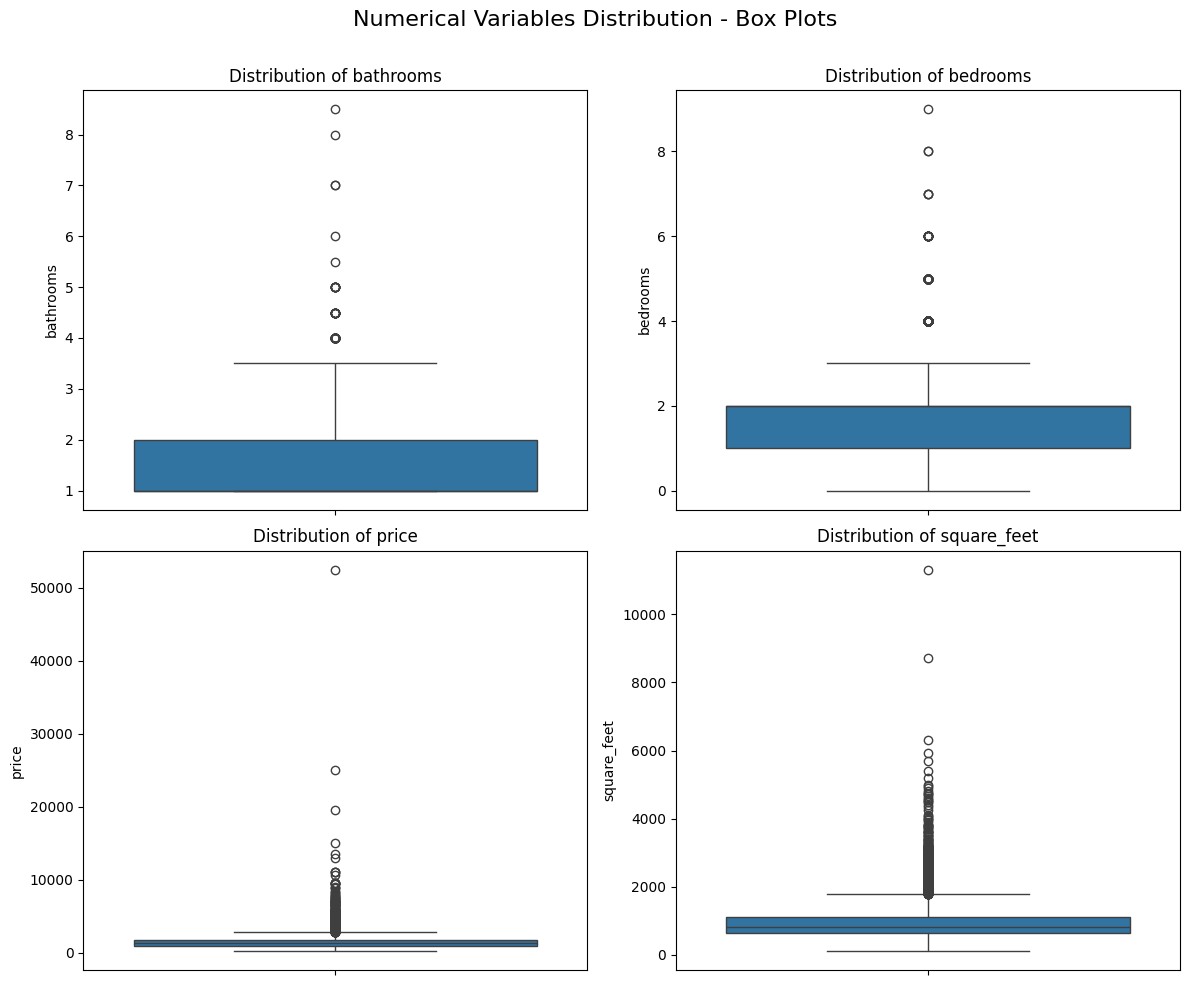

In [1054]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for ax, feature in zip(axes.flatten(), numer[:4]):
    sns.boxplot(y=rental[feature], ax=ax)
    ax.set_title(f'Distribution of {feature}')
    ax.set_ylabel(feature)
    

fig.suptitle("Numerical Variables Distribution - Box Plots", fontsize=16)
fig.tight_layout()
plt.subplots_adjust(top=0.9)  

plt.show()

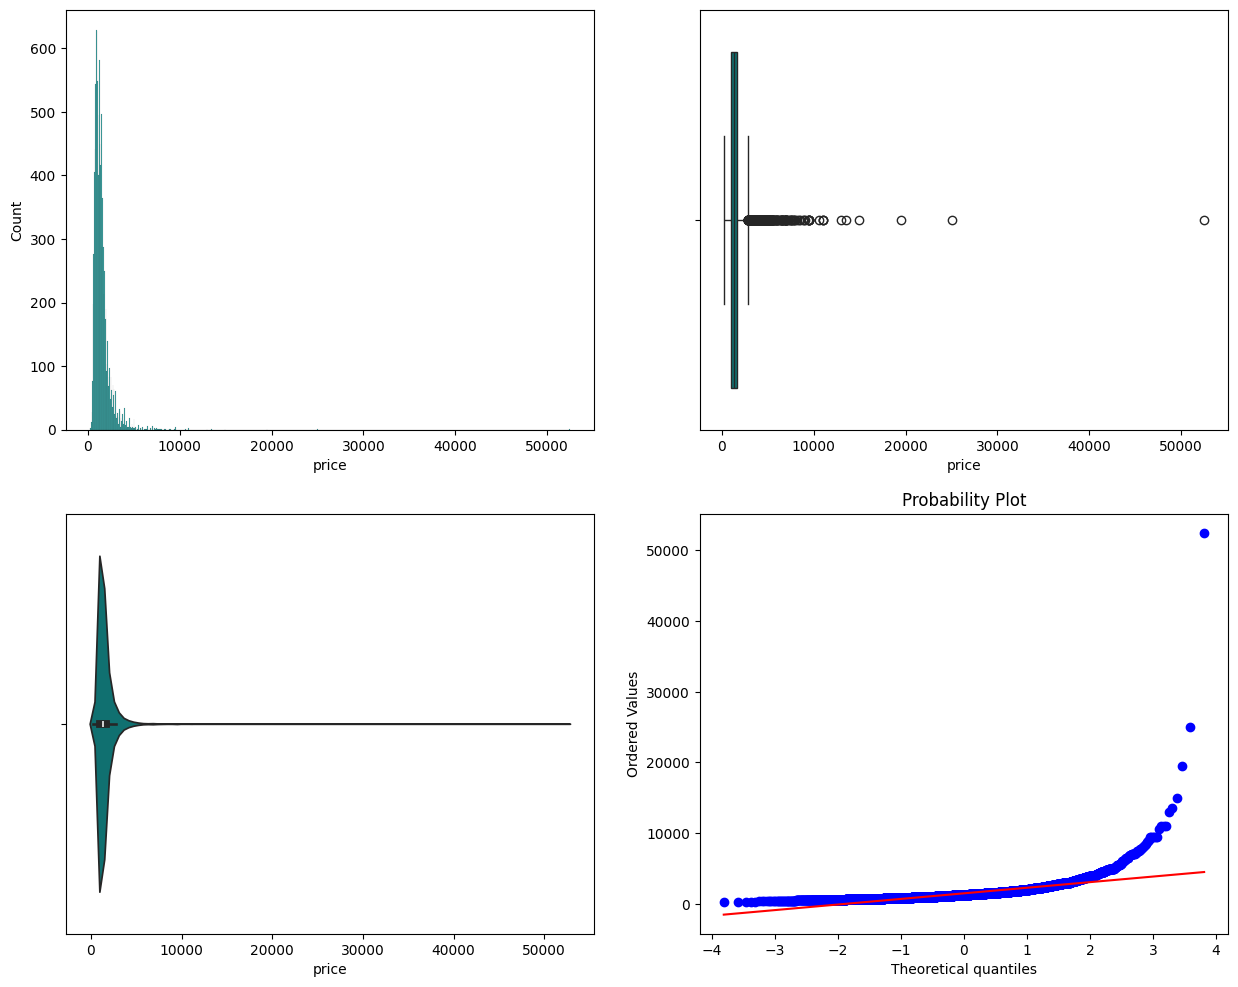

In [1055]:
fig, ax = plt.subplots(2, 2, figsize=(15, 12))
ax1 = sns.histplot(x = rental['price'], color='teal', ax= ax[0, 0])
ax2 = sns.boxplot(x = rental['price'], ax= ax[0, 1], color= 'teal')
ax3 = sns.violinplot(x = rental['price'], ax= ax[1, 0], color= 'teal')
ax4 = probplot(rental['price'], plot=pylab)
pylab.show()

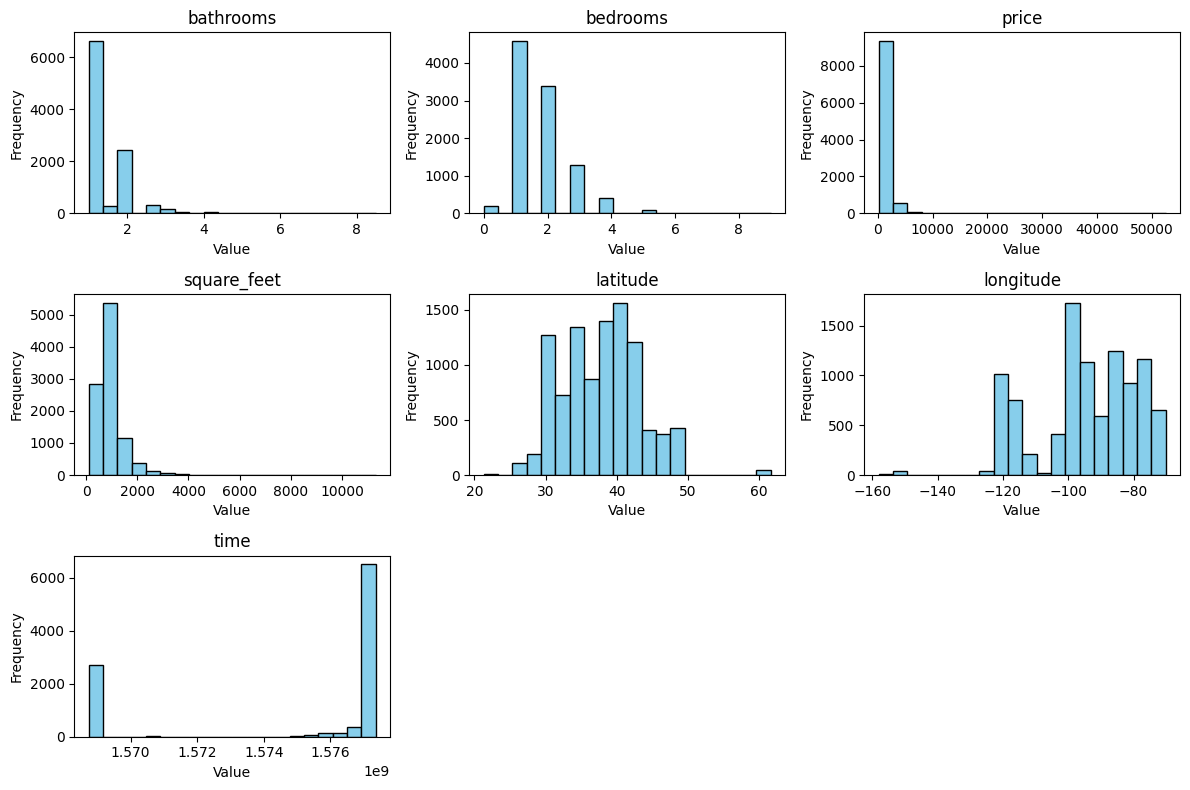

In [1056]:
numerical_columns = rental.select_dtypes(include=['float64', 'int64'])

# Plot histograms for numerical features
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns.columns, 1):
    plt.subplot(3, 3, i)
    plt.hist(rental[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

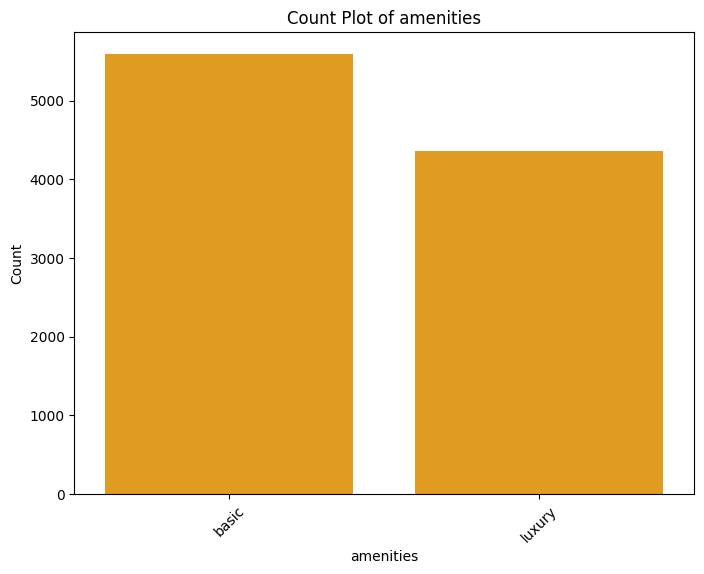

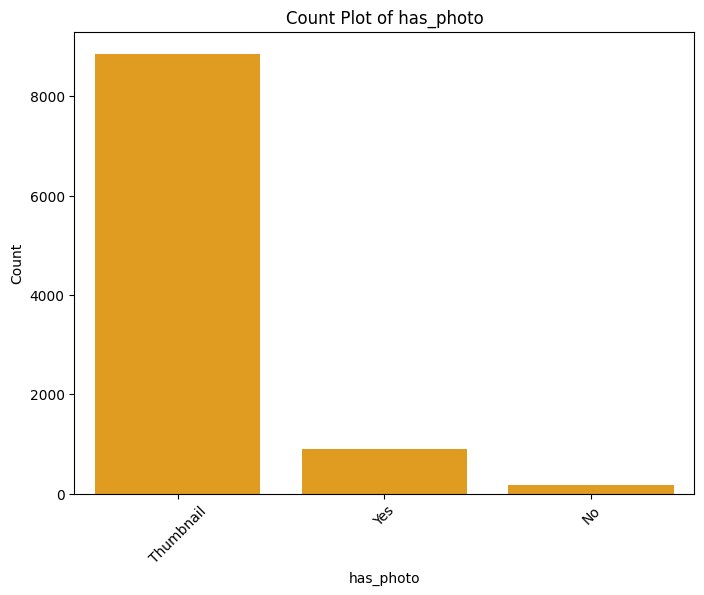

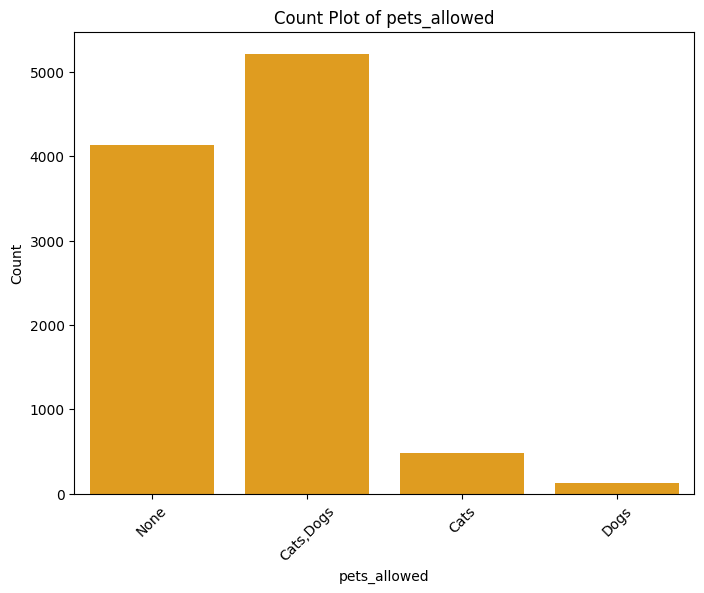

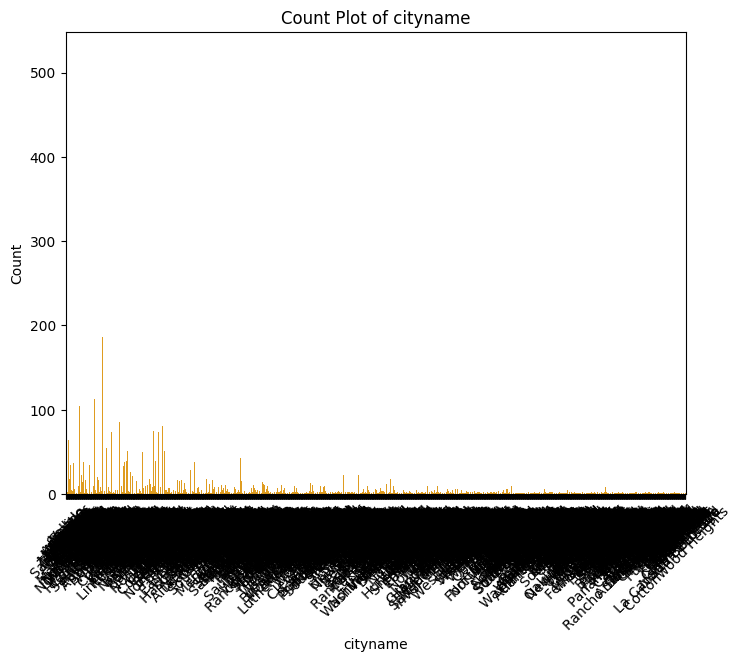

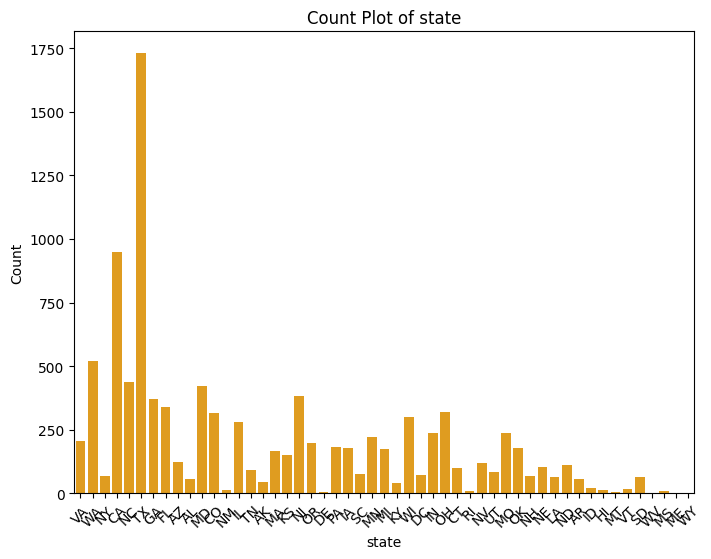

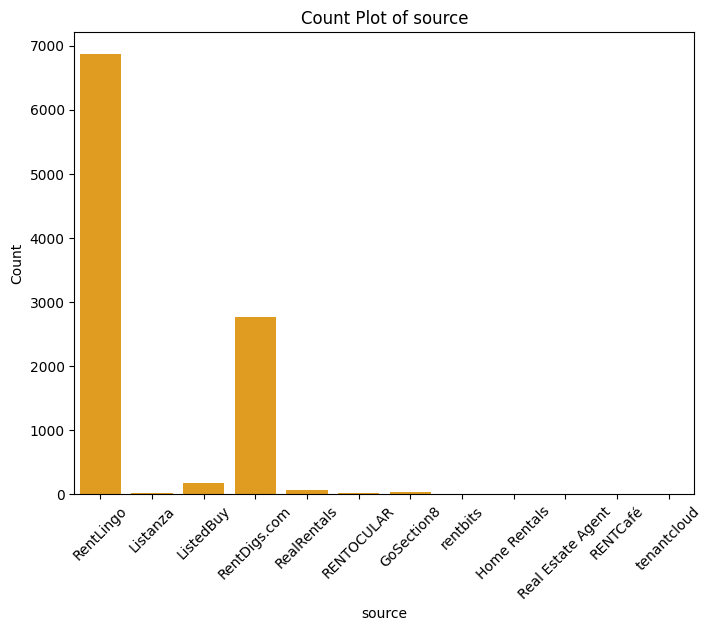

In [1057]:
# Select categorical columns
categorical_columns = rental.select_dtypes(include='object')

# Plot count plots
for column in categorical_columns.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=rental, x=column, color='orange')
    plt.title(f'Count Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [1058]:
# import folium

# map_center = [rental['latitude'].mean(), rental['longitude'].mean()]
# mymap = folium.Map(location=map_center, zoom_start=10)

# mean_price = rental['price'].mean()
# std_price = rental['price'].std()

# for idx, row in rental.iterrows():
#     if row['price'] < mean_price - std_price:
#         color = 'green'  
#     elif mean_price - std_price <= row['price'] <= mean_price + std_price:
#         color = 'blue' 
#     else:
#         color = 'red'
    
#     folium.CircleMarker(
#         location=[row['latitude'], row['longitude']],
#         radius=5,
#         color=color,
#         fill=True,
#         fill_color=color,
#         fill_opacity=0.6,
#         tooltip=f"{row['cityname']}: ${row['price']}"
#     ).add_to(mymap)

# mymap.save('map.html')

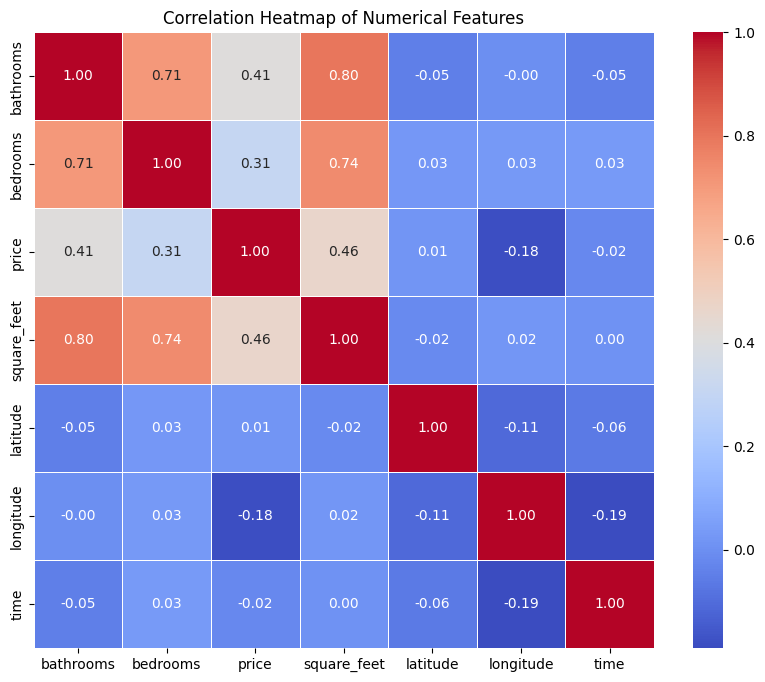

In [1059]:
numerical_columns = rental.select_dtypes(include=['float64', 'int64'])

corr_matrix = numerical_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

## Xử lý dữ liệu

In [1060]:
rental.describe()

,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
count,9949.000000,9949.000000,9949.000000,9949.000000,9949.000000,9949.000000,9.949000e+03
mean,1.380591,1.747512,1487.647502,943.285456,37.697032,-94.665136,1.574881e+09
std,0.615332,0.941587,1077.387033,526.440776,5.500716,15.760433,3.767721e+06
min,1.000000,0.000000,200.000000,107.000000,21.315500,-158.022100,1.568744e+09
25%,1.000000,1.000000,950.000000,650.000000,33.679500,-101.301700,1.568781e+09
50%,1.000000,2.000000,1275.000000,803.000000,38.809800,-93.651600,1.577358e+09
75%,2.000000,2.000000,1695.000000,1100.000000,41.349800,-82.302600,1.577359e+09
max,8.500000,9.000000,52500.000000,11318.000000,61.594000,-70.191600,1.577362e+09


In [1061]:
rental['time'] = pd.to_datetime(rental['time'])

#
rental['year'] = rental['time'].dt.year
rental['month'] = rental['time'].dt.month
rental['day_of_week'] = rental['time'].dt.dayofweek
rental['hour'] = rental['time'].dt.hour

rental['is_weekend'] = rental['day_of_week'].isin([5, 6]).astype(int)

rental.head()

,amenities,bathrooms,bedrooms,has_photo,pets_allowed,price,square_feet,cityname,state,latitude,longitude,source,time,year,month,day_of_week,hour,is_weekend
2,basic,1.0,0.0,Thumbnail,None,1390,107,Arlington,VA,38.8910,-77.0816,RentLingo,1970-01-01 00:00:01.577359410,1970,1,3,0,0
3,basic,1.0,0.0,Thumbnail,None,925,116,Seattle,WA,47.6160,-122.3275,RentLingo,1970-01-01 00:00:01.576667743,1970,1,3,0,0
5,luxury,1.0,0.0,Thumbnail,None,2475,130,Manhattan,NY,40.7629,-73.9885,Listanza,1970-01-01 00:00:01.577289784,1970,1,3,0,0
8,basic,1.0,0.0,Thumbnail,None,1495,138,San Francisco,CA,37.7599,-122.4379,RentLingo,1970-01-01 00:00:01.577358313,1970,1,3,0,0
14,basic,1.0,0.0,Thumbnail,None,1695,190,San Francisco,CA,37.7599,-122.4379,RentLingo,1970-01-01 00:00:01.577015121,1970,1,3,0,0


In [1062]:
print(rental['has_photo'].unique())
rental['has_photo'] = rental['has_photo'].map({'Thumbnail': 1, 'No': 0, 'Yes':1 })

print(rental['pets_allowed'].unique())
rental['pets_allowed'] = rental['pets_allowed'].map(lambda x: 0 if x == 'None' else 1)

print(rental.head())

['Thumbnail' 'Yes' 'No']
['None' 'Cats,Dogs' 'Cats' 'Dogs']
   amenities  bathrooms  bedrooms  has_photo  pets_allowed  price  \
2      basic        1.0       0.0          1             0   1390   
3      basic        1.0       0.0          1             0    925   
5     luxury        1.0       0.0          1             0   2475   
8      basic        1.0       0.0          1             0   1495   
14     basic        1.0       0.0          1             0   1695   

    square_feet       cityname state  latitude  longitude     source  \
2           107      Arlington    VA   38.8910   -77.0816  RentLingo   
3           116        Seattle    WA   47.6160  -122.3275  RentLingo   
5           130      Manhattan    NY   40.7629   -73.9885   Listanza   
8           138  San Francisco    CA   37.7599  -122.4379  RentLingo   
14          190  San Francisco    CA   37.7599  -122.4379  RentLingo   

                            time  year  month  day_of_week  hour  is_weekend  
2  1970-01-01

In [1063]:
# columns_to_drop = ['amenities','pets_allowed', 'address',"time","price_display","title","body","currency","id","state","cityname","price_type"]

# rental = rental.drop(columns=columns_to_drop)

# print(rental.head())

rental = rental.drop(columns=['time', 'cityname', 'state'])

In [1064]:
rental.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9949 entries, 2 to 9999
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   amenities     9949 non-null   object 
 1   bathrooms     9949 non-null   float64
 2   bedrooms      9949 non-null   float64
 3   has_photo     9949 non-null   int64  
 4   pets_allowed  9949 non-null   int64  
 5   price         9949 non-null   int64  
 6   square_feet   9949 non-null   int64  
 7   latitude      9949 non-null   float64
 8   longitude     9949 non-null   float64
 9   source        9949 non-null   object 
 10  year          9949 non-null   int64  
 11  month         9949 non-null   int64  
 12  day_of_week   9949 non-null   int64  
 13  hour          9949 non-null   int64  
 14  is_weekend    9949 non-null   int32  
dtypes: float64(4), int32(1), int64(8), object(2)
memory usage: 1.2+ MB


## Phân chia dữ liệu

In [1065]:
# scaler = MinMaxScaler()

# columns_to_scale = ['bathrooms', 'bedrooms']

# # Khởi tạo StandardScaler
# scaler = MinMaxScaler()

# # Chuẩn hóa các cột
# rental[columns_to_scale] = scaler.fit_transform(rental[columns_to_scale])

rental = pd.get_dummies(rental)

X = rental.drop('square_feet', axis= 1)
y = rental['square_feet']
bc_result = boxcox(y)
y_boxcox = bc_result[0]
lambda_ = bc_result[1]

X_train, X_test, y_train, y_test = train_test_split(X, y_boxcox, test_size= 0.2, random_state = 42)

## Xây dựng mô hình

### Hồi quy

In [1066]:
linear_reg = LinearRegression()
rf_reg = RandomForestRegressor(random_state=42)
dt_reg = DecisionTreeRegressor()
gbs_reg = GradientBoostingRegressor()

In [1067]:
linear_reg.fit(X_train, y_train)
rf_reg.fit(X_train, y_train)
dt_reg.fit(X_train, y_train)
gbs_reg.fit(X_train, y_train)

GradientBoostingRegressor()

In [1068]:
# make predictions
y_pred_lin_reg = linear_reg.predict(X_test)
y_pred_forest_reg = rf_reg.predict(X_test)
y_pred_tree_reg = dt_reg.predict(X_test)
y_pred_gradient_reg = gbs_reg.predict(X_test)

In [1069]:

lin_r2 = r2_score(y_test , y_pred_lin_reg)
print("Linear Regression R-squared: {}".format(lin_r2))

forest_r2 = r2_score(y_test , y_pred_forest_reg)
print("Random Forest R-squared: {}".format(forest_r2))

decision_r2 = r2_score(y_test, y_pred_tree_reg)
print("Decision Tree R-squared: {}".format(decision_r2))

gradient_r2 = r2_score(y_test, y_pred_gradient_reg)
print("Gradient Boosting R-squared: {}".format(gradient_r2))

Linear Regression R-squared: 0.6171014742970107
Random Forest R-squared: 0.761322198158272
Decision Tree R-squared: 0.5842999529193209
Gradient Boosting R-squared: 0.7162925775547693


In [ ]:
lin_mse = mean_squared_error(y_pred_lin_reg, y_test)
lin_rmse = np.sqrt(lin_mse)
print("Linear Regression RMSE: {}".format(lin_rmse))

forest_mse = mean_squared_error(y_pred_forest_reg, y_test)
forest_rmse = np.sqrt(forest_mse)
print("Random Forest Regression RMSE: {}".format(forest_rmse))


decision_mse = mean_squared_error(y_pred_tree_reg, y_test)
decision_rmse = np.sqrt(decision_mse)
print("Decision Tree Regression RMSE: {}".format(decision_rmse))

gradient_mse = mean_squared_error(y_pred_gradient_reg, y_test)
gradient_rmse = np.sqrt(gradient_mse)
print("Gradient Boosting RMSE: {}".format(gradient_rmse))

Linear Regression RMSE: 0.12000854754009242
Random Forest Regression RMSE: 0.09474937353410202
Decision Tree Regression RMSE: 0.12504328350908972
Gradient Boosting RMSE: 0.10330127491529321


In [1075]:
lin_mae = mean_absolute_error(y_pred_lin_reg, y_test)
print("Liner Regression MAE: {}".format(lin_mae))
forest_mae = mean_absolute_error(y_pred_forest_reg, y_test)
print("Random Forest Regression MAE: {}".format(forest_mae))

decision_mae = mean_absolute_error(y_pred_tree_reg, y_test)
print("Decision Tree Regression MAE: {}".format(decision_mae))

gradient_mae = mean_absolute_error(y_pred_tree_reg, y_test)
print("Gradient Boosting MAE: {}".format(gradient_mae))

Liner Regression MAE: 0.08482167117689911
Random Forest Regression MAE: 0.06750497389983891
Decision Tree Regression MAE: 0.08623410556565897
Gradient Boosting MAE: 0.08623410556565897


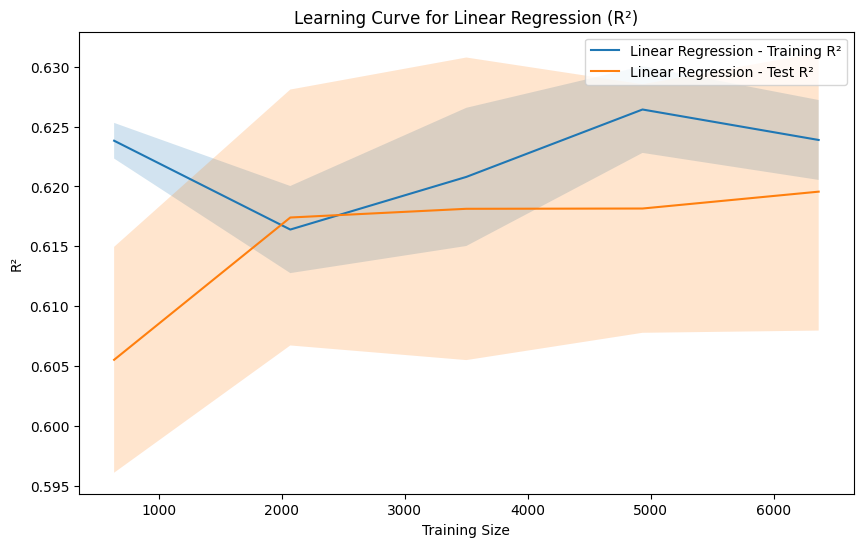

KeyboardInterrupt: 

In [1085]:
# Danh sách các mô hình
model_list = [linear_reg, rf_reg, dt_reg, gbs_reg]
model_names = ['Linear Regression', 'Random Forest', 'Decision Tree', 'Gradient Boosting']

for model, model_name in zip(model_list, model_names):
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring="r2")
    
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Tạo đồ thị riêng cho mỗi mô hình
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label=f"{model_name} - Training R²")
    plt.plot(train_sizes, test_mean, label=f"{model_name} - Test R²")
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)

    # Thêm tiêu đề, nhãn và chú thích cho mỗi mô hình
    plt.xlabel('Training Size')
    plt.ylabel('R²')
    plt.legend()
    plt.title(f'Learning Curve for {model_name} (R²)')
    plt.show()


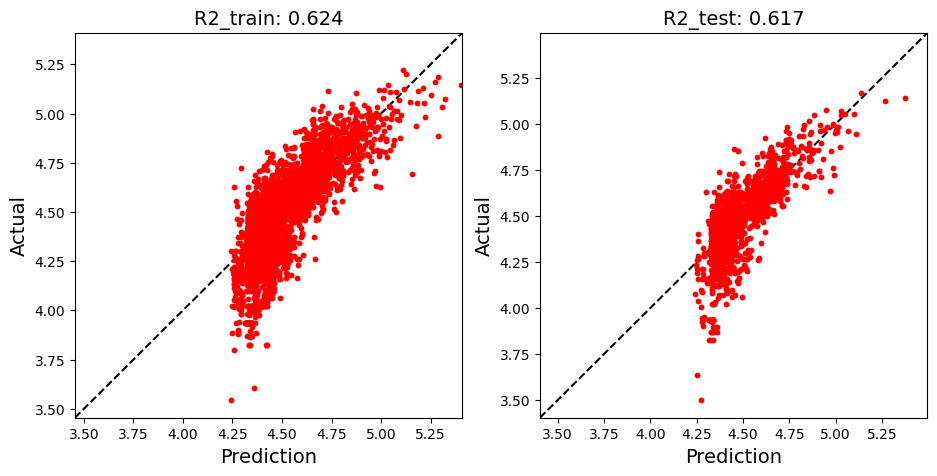

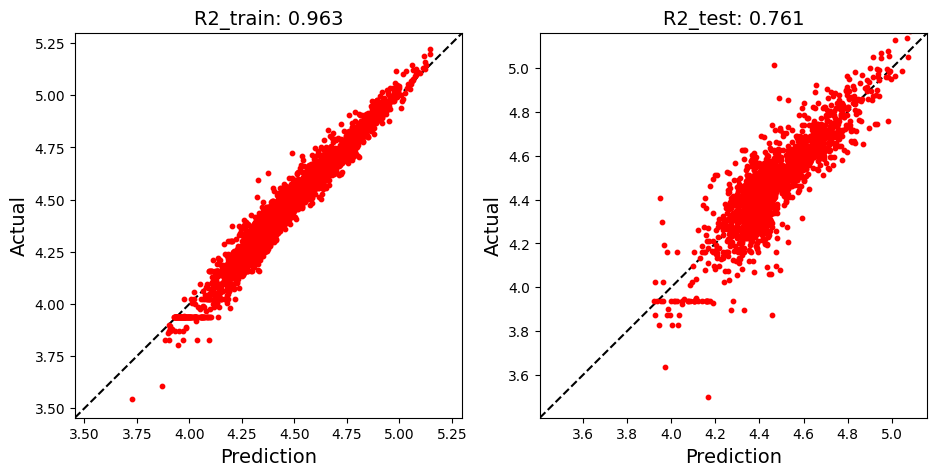

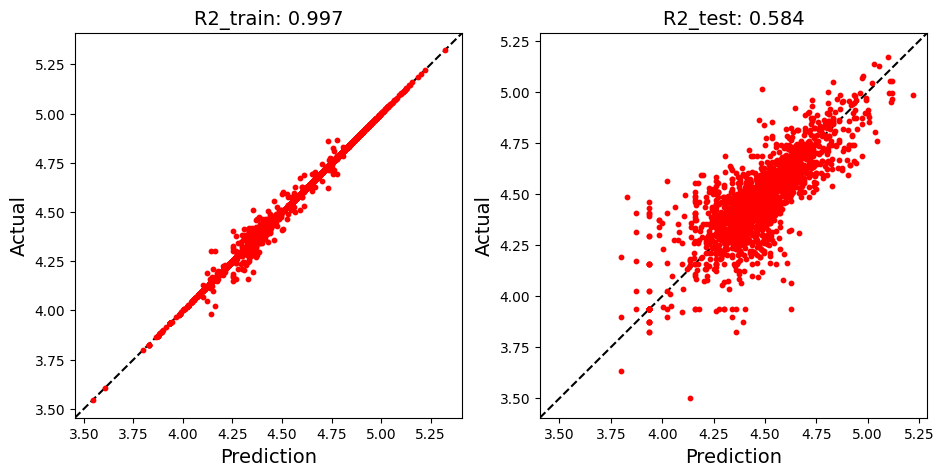

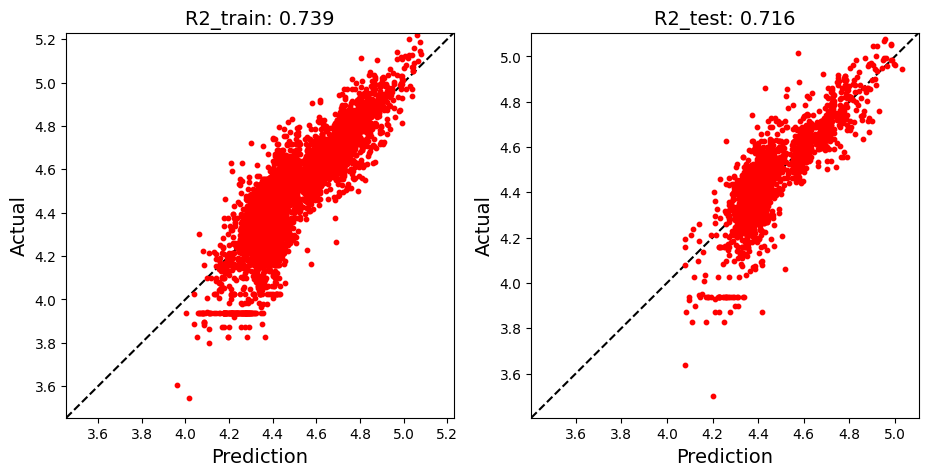

In [1077]:
model_list = [linear_reg, rf_reg, dt_reg, gbs_reg]
for model in model_list:
    plot_actual_vs_prediction(X_train, y_train, X_test, y_test, model)


### Phân loại

In [1073]:
log_reg = LogisticRegression(max_iter=200)
rf_cls = RandomForestClassifier()
dt_cls = DecisionTreeClassifier()
gbc_cls = GradientBoostingClassifier()
knn_cls = KNeighborsClassifier(n_neighbors=5)

In [1074]:
#Huấn luyện
log_reg.fit(X_train, y_train_class)
rf_cls.fit(X_train, y_train_class)
dt_cls.fit(X_train,y_train_class)
gbc_cls.fit(X_train,y_train_class)
knn_cls.fit(X_train,y_train_class)

NameError: name 'y_train_class' is not defined

In [ ]:
y_pred_log_reg = log_reg.predict(X_test)
y_pred_rf_cls = rf_cls.predict(X_test)
y_pred_dt_cls = dt_cls.predict(X_test)
y_pred_gbs_cls = gbc_cls.predict(X_test)
y_pred_knn_cls = knn_cls.predict(X_test)

In [ ]:
acc_log_reg = accuracy_score(y_test_class, y_pred_log_reg)
acc_pred_rf_cls =accuracy_score(y_test_class, y_pred_rf_cls)
acc_dt_cls = accuracy_score(y_test_class, y_pred_dt_cls)
acc_gbs_cls = accuracy_score(y_test_class, y_pred_gbs_cls)
acc_knn_cls = accuracy_score(y_test_class, y_pred_knn_cls)

In [ ]:
print("Accuracy of Logistic Regression:\n",acc_log_reg)
print("Accuracy of Random Forest:\n",acc_pred_rf_cls)
print("Accuracy of Decision Tree:\n",acc_dt_cls )
print("Accuracy of Gradient Boosting:\n",acc_gbs_cls)
print("Accuracy of Gradient Boosting:\n",acc_knn_cls)


Accuracy of Logistic Regression:
 0.8051441932969603
Accuracy of Random Forest:
 0.8456742010911925
Accuracy of Decision Tree:
 0.8020265003897116
Accuracy of Gradient Boosting:
 0.8269680436477007
Accuracy of Gradient Boosting:
 0.730319563522993
